# <center> Advanced Hypothesis Testing<center>
  
<center>
    Zander Bonnet
          
<center>
    March 27, 2024


References:

Cardiovascular Disease dataset. (2019). Kaggle [Dataset]. https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset/data.

Memory Test on Drugged Islanders Data. (2019). Kaggle [Dataset]. https://www.kaggle.com/datasets/steveahn/memory-test-on-drugged-islanders-data.
    
Rogel-Salazar, J. (2023). Statistics and Data Visualization with Python. CRC Press.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Paired Test

Problem: We want to know how anxiety medication effects your memory.

Question: What anti-anxiety medication results in the best improvement in the memory score.

Data: A collection of memory scores before and after a treatment

Test: Paired T-Test

I picked this test because we are analying if there is a true change in the same individuals responces.

# Video: https://vimeo.com/928168407/11c85eb9d7?share=copy
### For All Treatments

In [2]:
mem = pd.read_csv('/Users/zanderbonnet/Desktop/GCU/DSC_510/DataSets/Islander_data.csv')
mem.head()

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff
0,Bastian,Carrasco,25,H,1,A,63.5,61.2,-2.3
1,Evan,Carrasco,52,S,1,A,41.6,40.7,-0.9
2,Florencia,Carrasco,29,H,1,A,59.7,55.1,-4.6
3,Holly,Carrasco,50,S,1,A,51.7,51.2,-0.5
4,Justin,Carrasco,52,H,1,A,47.0,47.1,0.1


In [3]:
#Check if both distrobutions are normal
print(stats.shapiro(mem['Mem_Score_Before']))
print(stats.shapiro(mem['Mem_Score_After']))
#check for difference in varriance
print(stats.levene(mem['Mem_Score_Before'],mem['Mem_Score_After']))

ShapiroResult(statistic=0.9610794186592102, pvalue=2.8495958758867346e-05)
ShapiroResult(statistic=0.9539175629615784, pvalue=5.08873381477315e-06)
LeveneResult(statistic=2.6810213428646015, pvalue=0.10234896676702988)


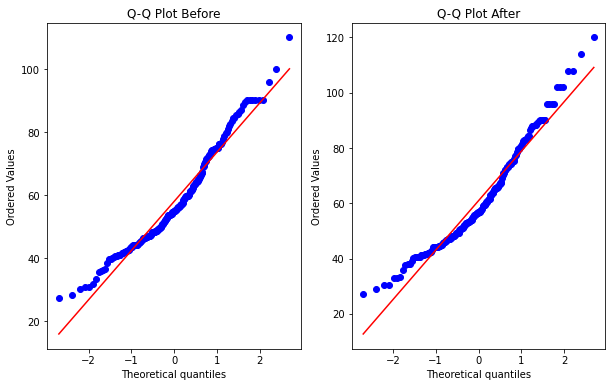

In [4]:
#Visualize normality
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (10,6))
stats.probplot(mem['Mem_Score_Before'], plot = ax1, fit = True)
ax1.title.set_text('Q-Q Plot Before')
stats.probplot(mem['Mem_Score_After'], plot = ax2, fit = True)
ax2.title.set_text('Q-Q Plot After')
plt.show()

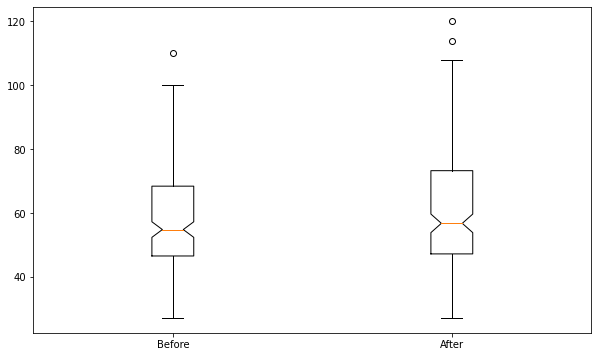

In [5]:
#see difference
plt.figure(figsize = (10,6))
plt.boxplot([mem['Mem_Score_Before'], mem['Mem_Score_After']], notch= True, labels=['Before', 'After'])
plt.show()

In [6]:
#See if treatment improved the score
stats.ttest_rel(mem['Mem_Score_Before'], mem['Mem_Score_After'], alternative='less')

Ttest_relResult(statistic=-3.8657067402083998, pvalue=7.517823312147959e-05)

### By Treatment

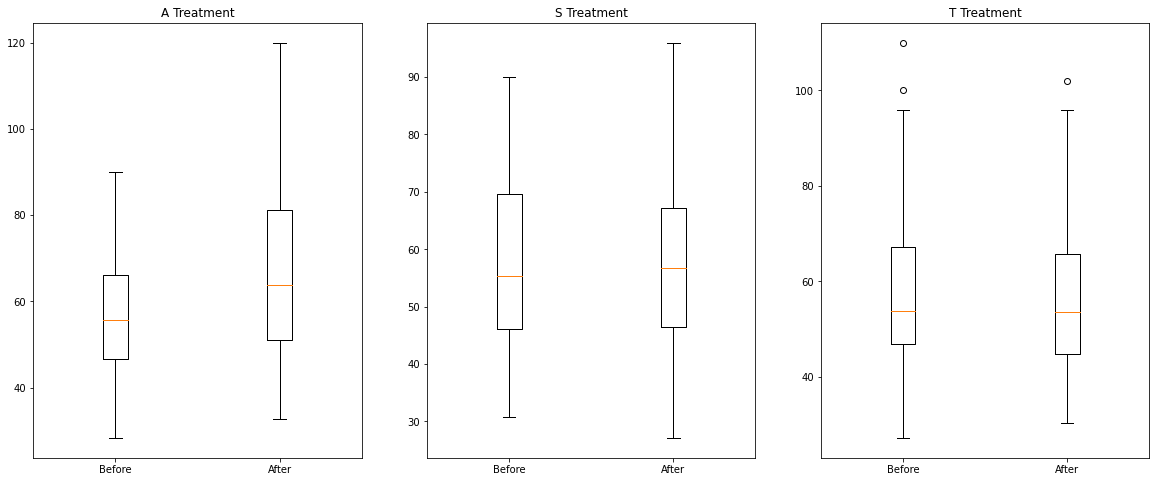

In [7]:
#Visualize the difference by treatment
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize = (20,8))
a = mem[mem['Drug'] == 'A']
ax1.boxplot([a['Mem_Score_Before'],a['Mem_Score_After']], labels= ['Before','After'])
ax1.title.set_text('A Treatment')

s = mem[mem['Drug'] == 'S']
ax2.boxplot([s['Mem_Score_Before'],s['Mem_Score_After']], labels= ['Before','After'])
ax2.title.set_text('S Treatment')

t = mem[mem['Drug'] == 'T']
ax3.boxplot([t['Mem_Score_Before'],t['Mem_Score_After']], labels= ['Before','After'])
ax3.title.set_text('T Treatment')
plt.show()

In [8]:
#check assumptions for treatment A
print(stats.shapiro(a['Mem_Score_Before']))
print(stats.shapiro(a['Mem_Score_After']))
print(stats.levene(a['Mem_Score_Before'],a['Mem_Score_After']))

ShapiroResult(statistic=0.9659509062767029, pvalue=0.06324799358844757)
ShapiroResult(statistic=0.950230062007904, pvalue=0.009348686784505844)
LeveneResult(statistic=5.043152992741923, pvalue=0.02638596122440081)


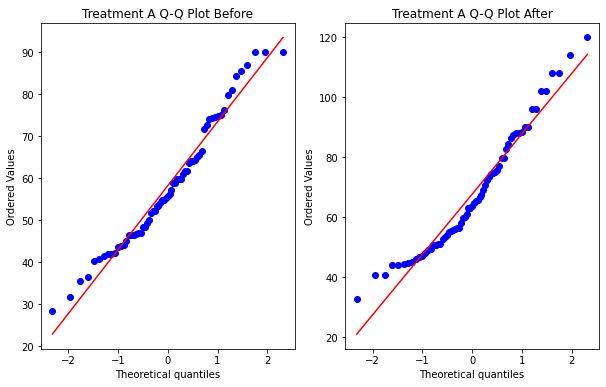

In [9]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (10,6))
stats.probplot(a['Mem_Score_Before'], plot = ax1, fit = True)
ax1.title.set_text('Treatment A Q-Q Plot Before')
stats.probplot(a['Mem_Score_After'], plot = ax2, fit = True)
ax2.title.set_text('Treatment A Q-Q Plot After')
plt.show()

In [10]:
treatments = list(mem['Drug'].unique())

for t in treatments:
    d = mem[mem['Drug'] == t]
    print('Treatment:',t)
    print(stats.ttest_rel(d['Mem_Score_Before'], d['Mem_Score_After'], alternative= 'less'))

Treatment: A
Ttest_relResult(statistic=-5.848567939730842, pvalue=8.449089967649337e-08)
Treatment: S
Ttest_relResult(statistic=0.18545974088426578, pvalue=0.5732770162332981)
Treatment: T
Ttest_relResult(statistic=0.6669171283034249, pvalue=0.7463887764378385)


It was found that the most effective treatment in this study was treatment a A.

In conducting this test I checked the assumptions that the data follows a normal distrobution, the data points are independent of eachother, and that the varriance is similar between. the variables.

If any of these assumptions were to be violated we would not get a reliable result.

# Multiple Population Means Analysis

Problem: There are many factors that determine weight. We need to find the major dofferences in what cause variation in weight.

Question: Is there a significant difference in weight in men and women?

Data: A collection of datapoints to help predict heart disease

Test: ANOVA/independent t-test

These tests were picked becasue they are to analyze the difference in independent samples. ANOVA will work on more than 2 samples, while the t-test will work on only two. They should both similar results in this case.

# Video : https://vimeo.com/928169780/01a6ce7b51?share=copy


In [11]:
cardio = pd.read_csv('/Users/zanderbonnet/Desktop/GCU/DSC_510/DataSets/cardio.csv', delimiter= ';')
#age in days
#height in cm
#weight in kg
#gender 1 = f, 2 = m
cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [12]:
gender = [] #sets gender to strings
for gen in cardio['gender']:
    if gen == 1:
        gender.append("Female")
    elif gen == 2:
        gender.append("Male")
    else:
        gender.append('Missing')
cardio['gender'] = gender
cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,Male,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,Female,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,Female,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,Male,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,Female,156,56.0,100,60,1,1,0,0,0,0


In [27]:
#Check Assumptions
print(stats.shapiro(cardio[cardio['gender'] == 'Male']['weight']))
print(stats.shapiro(cardio[cardio['gender'] == 'Female']['weight']))
print(stats.levene(cardio[cardio['gender'] == 'Male']['weight'], cardio[cardio['gender'] == 'Female']['weight']))

ShapiroResult(statistic=0.9524598717689514, pvalue=0.0)
ShapiroResult(statistic=0.9497232437133789, pvalue=0.0)
LeveneResult(statistic=1.0039293043790916, pvalue=0.3163650591010906)


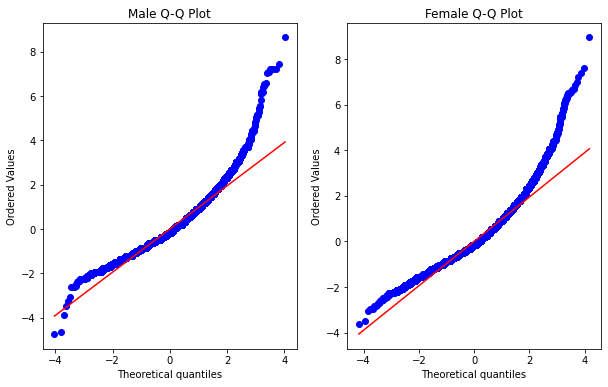

In [14]:
#Visulaize Normality
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (10,6))
zsM = stats.zscore(cardio[cardio['gender'] == 'Male']['weight'])
stats.probplot(zsM, plot = ax1, fit = True, dist = 'norm')
ax1.title.set_text('Male Q-Q Plot')

zsF = stats.zscore(cardio[cardio['gender'] == 'Female']['weight'])
stats.probplot(zsF, plot = ax2, fit = True, dist = 'norm')
ax2.title.set_text('Female Q-Q Plot')
plt.show()

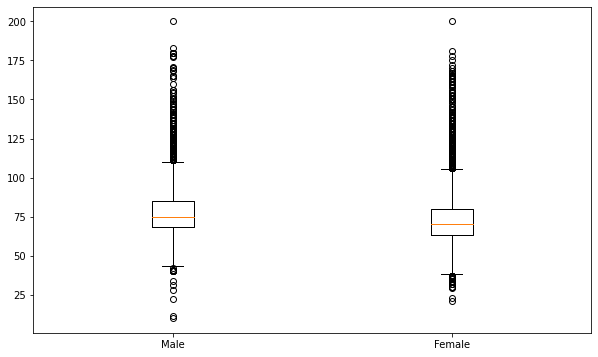

In [15]:
#Distrobution
plt.figure(figsize = (10,6))
plt.boxplot([
    cardio[cardio['gender'] == 'Male']['weight'],
    cardio[cardio['gender'] == 'Female']['weight']
],labels = ['Male','Female']
)

plt.show()

In [16]:
print(stats.f_oneway(cardio[cardio['gender'] == 'Male']['weight'],cardio[cardio['gender'] == 'Female']['weight']))
print(stats.ttest_ind(cardio[cardio['gender'] == 'Male']['weight'],cardio[cardio['gender'] == 'Female']['weight']))

F_onewayResult(statistic=1732.3535254278527, pvalue=0.0)
Ttest_indResult(statistic=41.6215512136182, pvalue=0.0)


### Drop Outliers

In [17]:
#Gets trimmed datasets
Q3M = np.quantile(cardio[cardio['gender'] == 'Male']['weight'],.75)
Q1M = np.quantile(cardio[cardio['gender'] == 'Male']['weight'],.25)
IQRM = Q3M - Q1M
upthreshM = Q3M + (1.5*IQRM)
lowthreshM = Q1M - (1.5*IQRM)
trimM = cardio[(cardio['weight'] < upthreshM) & (cardio['weight'] > lowthreshM)].loc[cardio['gender'] == 'Male']

Q3F = np.quantile(cardio[cardio['gender'] == 'Female']['weight'],.75)
Q1F = np.quantile(cardio[cardio['gender'] == 'Female']['weight'],.25)
IQRF = Q3F - Q1F
upthreshF = Q3F + (1.5*IQRF)
lowthreshF = Q1F - (1.5*IQRF)
trimF = cardio[(cardio['weight'] < upthreshF) & (cardio['weight'] > lowthreshF)].loc[cardio['gender'] == 'Female']

In [26]:
#checks assumptions
print(stats.shapiro(trimM['weight']))
print(stats.shapiro(trimF['weight']))
print(stats.levene(trimM['weight'], trimF['weight']))

ShapiroResult(statistic=0.9849572777748108, pvalue=1.2611686178923354e-43)
ShapiroResult(statistic=0.9838199019432068, pvalue=0.0)
LeveneResult(statistic=6.603992025788873, pvalue=0.010177140236124286)


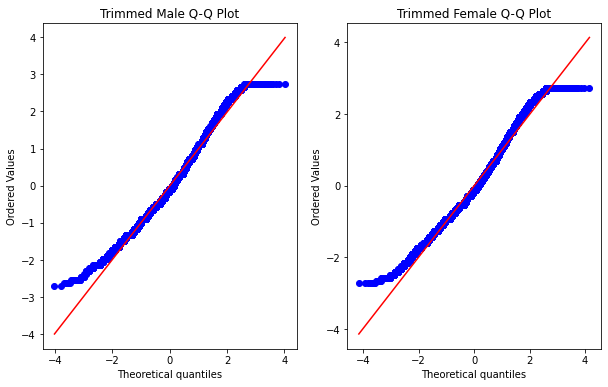

In [19]:
#visulaize normality
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (10,6))
zsMT = stats.zscore(trimM['weight'])
stats.probplot(zsMT, plot = ax1, fit = True, dist = 'norm')
ax1.title.set_text('Trimmed Male Q-Q Plot')

zsFT = stats.zscore(trimF['weight'])
stats.probplot(zsFT, plot = ax2, fit = True, dist = 'norm')
ax2.title.set_text('Trimmed Female Q-Q Plot')
plt.show()

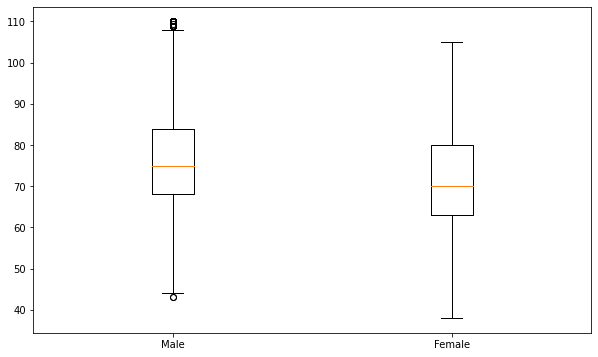

In [20]:
#visualize distrobution
plt.figure(figsize = (10,6))
plt.boxplot([
    trimM['weight'],
    trimF['weight']
],labels = ['Male','Female']
)
plt.show()

In [21]:
print(stats.f_oneway(trimM['weight'],trimF['weight']))
print(stats.ttest_ind(trimM['weight'],trimF['weight']))

F_onewayResult(statistic=2343.287893190978, pvalue=0.0)
Ttest_indResult(statistic=48.407518973719256, pvalue=0.0)


It was found that there is a significant difference in the weights of men and women in this dataset.

I checked the assumptions of normality, independent observations, and equal variance. The data set contains so many data points that it is hard to check the normality assumption, so I created a QQ plot ot visualze the normality. This resulted in finding a large deviation from normality at the higher weights so I removed the ouliers to combat this. This increased the normality of the data, and allowed for a more accurate test. The test became more powerful after the removal of outliers from both the men and the women.

# Variance Comparison Analysis

Problem: We now that there is an increase in responce score, but is there a difference in the distrobution of change.

Question: Do the treatments have different variances in the difference in the change before and after treatment?

Data: A collection of memory scores before and after a treatment

Test: Levene test

This test was picked so that we can analyze if the populations that these samples are taken from are statistaclly different. This will show us if there is a difference in the spread of the impact of each medication.

# Video : https://vimeo.com/928171231/de998c50d3?share=copy 

In [22]:
mem = pd.read_csv('/Users/zanderbonnet/Desktop/GCU/DSC_510/DataSets/Islander_data.csv')
mem.head()

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff
0,Bastian,Carrasco,25,H,1,A,63.5,61.2,-2.3
1,Evan,Carrasco,52,S,1,A,41.6,40.7,-0.9
2,Florencia,Carrasco,29,H,1,A,59.7,55.1,-4.6
3,Holly,Carrasco,50,S,1,A,51.7,51.2,-0.5
4,Justin,Carrasco,52,H,1,A,47.0,47.1,0.1


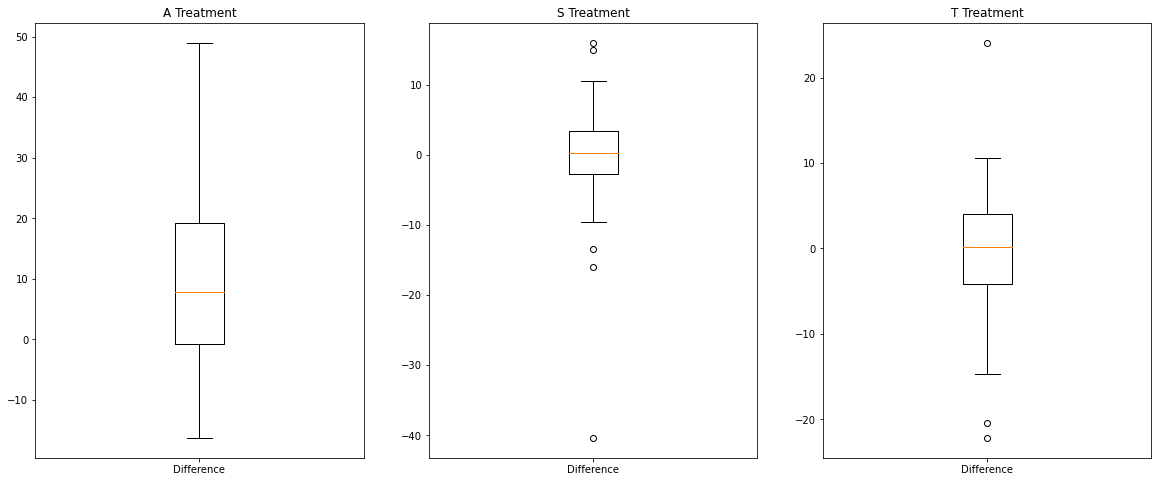

In [23]:
#Visualize the difference by treatment
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize = (20,8))
a = mem[mem['Drug'] == 'A']
ax1.boxplot(a['Diff'], labels = ['Difference'])
ax1.title.set_text('A Treatment')

s = mem[mem['Drug'] == 'S']
ax2.boxplot(s['Diff'], labels = ['Difference'])
ax2.title.set_text('S Treatment')

t = mem[mem['Drug'] == 'T']
ax3.boxplot(t['Diff'], labels = ['Difference'])
ax3.title.set_text('T Treatment')
plt.show()

In [24]:
print(stats.levene(a['Diff'],s['Diff'],t['Diff']))

LeveneResult(statistic=19.066413321946992, pvalue=2.7355222091967235e-08)


From this we know that there is a wider spread of change in one of the treatments. This could show that there are some people that respond very well to the treatment, and others that respond modertly well. This might lead us to dive deeper into the reasoning behind this.

The assumption of this test is that the data is indpendent, and that there are no major outliers. This is not violated becuase all of the groups are seperated.

If I were not follow these assuptions it woudl give us a false reading. The outliers one is most important, becasue if one data set has a skewed variance do to an outlier it would casue the test to false positive. In this case the outlier in the S treatment is not leading to a flase positive becasue the A treatment has a different variance.